# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
        - **masks**: contains the custom 'mask_{lens_name}_{band}.npy' files (optional),
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_variance_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis.output import Output

### create a `Processor` instance and point to the IO directory

In [2]:
processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [ ]:
processor.swim(lens_name="lens_system2", model_id="example", log=False)

Optimizing model for lens_system2 with recipe: default.
Computing the PSO ...


 32%|███▏      | 16/50 [00:18<00:40,  1.19s/it]

## Let's check the output

In [ ]:
output = Output("../io_directory_example/")

/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),


-1.0641619180205766 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0641619180205761


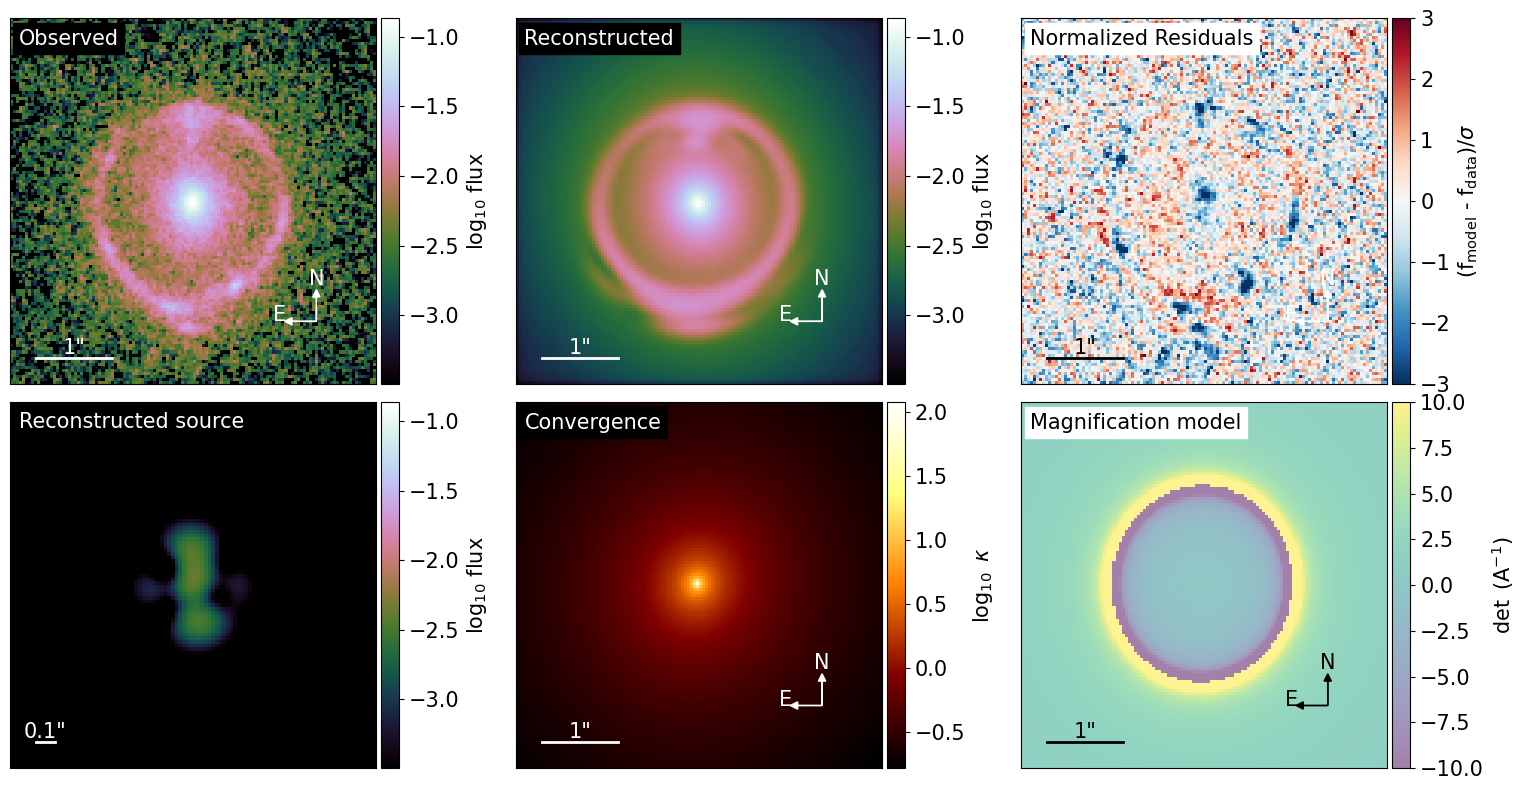

In [ ]:
fig = output.plot_model_overview(lens_name="lens_system2", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [ ]:
output.load_output(lens_name="lens_system2", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.2359411358441714,
   'gamma': 2.0316121314686773,
   'e1': -0.03766671653658394,
   'e2': -0.028396970071411693,
   'center_x': 0.045725190733932705,
   'center_y': -0.0010278015942316188},
  {'gamma_ext': 0.022910123104202647,
   'psi_ext': -0.6987658390437393,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 4,
   'beta': 0.102992211001076,
   'center_x': 0.06287593668357011,
   'center_y': -0.26581607789493394}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 2.748539972366366,
   'n_sersic': 4.0,
   'e1': -0.06677444508357547,
   'e2': 0.022222108973079375,
   'center_x': 0.026923614974169525,
   'center_y': -0.052249603699951186}],
 'kwargs_ps': [],
 'kwargs_special': {},
 'kwargs_extinction': [],
 'kwargs_tracer_source': []}

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [ ]:
output.model_settings

{'system_name': 'lens_system2',
 'band': ['F390W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 20, 'num_iteration': 50},
  'sampling': True,
  'sampler': 'emcee',
  'sampler_settings': {'n_burn': 0,
   'n_run': 100,
   'walkerRatio': 2,
   'threadCount': 1,
   'init_samples': None}},
 'numeric_option': {'supersampling_factor': [2]},
 'pixel_size': [0.040000194494947836]}